<a href="https://colab.research.google.com/github/amanks-20/computer-vision-applications-in-transportation-engineering/blob/main/200100_Aman_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2 
import tensorflow as tf 
from PIL import Image 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import os 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Traffic_Data')

Mounted at /content/drive


**Data photos and their labels are added to an empty list.**

In [18]:
data = []   # This will store the numpy arrays of the image
labels = [] # This is where all of images' labels are kept
classes = 58
cur_path = os.getcwd()
for i in range(classes):     
    path = os.path.join(cur_path,'DATA',str(i))     
    images = os.listdir(path)
    for a in images:
      try:
        image = Image.open(path +'//'+ a)             
        image = image.resize((30,30))                                                  
        image = np.array(image)  # convert images into numpy array           
        data.append(image)  
        labels.append(i)
      except Exception as e:
        print(e)
        

data = np.array(data) # convert this list into a numpy array as our ANN will take numpy array as an input
labels = np.array(labels) # convert this list into a numpy array as our ANN will take numpy array as an input
  

In [19]:
data.shape 

(4240, 30, 30, 3)

In [ ]:
labels.shape

(4240,)

Splitting into 80% Training set and 20% test

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3392, 30, 30, 3) (848, 30, 30, 3) (3392,) (848,)


Now splitting test set into further 50% test set and 50% validation set. Therefore we get 80-10-10 split

In [ ]:
X_test, X_val, y_test, y_val =train_test_split(X_test, y_test, test_size=0.5, random_state=0)
print(X_test.shape, X_val.shape, y_test.shape, y_val.shape)

(424, 30, 30, 3) (424, 30, 30, 3) (424,) (424,)


In [ ]:
y_test.shape

(424,)

Converting all y values into one hot encoded vectors

In [ ]:
y_train = to_categorical(y_train,58) 
y_test = to_categorical(y_test,58)
y_val = to_categorical(y_val,58)

In [20]:
model =Sequential() 

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:])) 

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu')) 

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25)) 

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 

model.add(MaxPool2D(pool_size=(2,2))) 

model.add(Dropout(rate=0.25)) 

model.add(Flatten()) 

model.add(Dense(256, activation='relu')) 

model.add(Dropout(rate=0.5))

model.add(Dense(58, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
epochs = 15
val_history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/15
106/106 [==============================] - 16s 142ms/step - loss: 4.7386 - accuracy: 0.1445 - val_loss: 2.7202 - val_accuracy: 0.2854
Epoch 2/15
106/106 [==============================] - 18s 173ms/step - loss: 2.4784 - accuracy: 0.3841 - val_loss: 1.6706 - val_accuracy: 0.6604
Epoch 3/15
106/106 [==============================] - 17s 160ms/step - loss: 1.7631 - accuracy: 0.5575 - val_loss: 1.1719 - val_accuracy: 0.7618
Epoch 4/15
106/106 [==============================] - 15s 141ms/step - loss: 1.4058 - accuracy: 0.6203 - val_loss: 0.8801 - val_accuracy: 0.7877
Epoch 5/15
106/106 [==============================] - 15s 141ms/step - loss: 1.2689 - accuracy: 0.6453 - val_loss: 0.7544 - val_accuracy: 0.8561
Epoch 6/15
106/106 [==============================] - 15s 144ms/step - loss: 1.0240 - accuracy: 0.7096 - val_loss: 0.6052 - val_accuracy: 0.8514
Epoch 7/15
106/106 [==============================] - 15s 146ms/step - loss: 0.9671 - accuracy: 0.7373 - val_loss: 0.5344 - val_ac

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
epochs = 15
test_history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
106/106 [==============================] - 16s 144ms/step - loss: 0.5360 - accuracy: 0.8464 - val_loss: 0.2491 - val_accuracy: 0.9316
Epoch 2/15
106/106 [==============================] - 15s 144ms/step - loss: 0.4778 - accuracy: 0.8617 - val_loss: 0.2469 - val_accuracy: 0.9222
Epoch 3/15
106/106 [==============================] - 16s 152ms/step - loss: 0.4430 - accuracy: 0.8703 - val_loss: 0.2387 - val_accuracy: 0.9363
Epoch 4/15
106/106 [==============================] - 15s 141ms/step - loss: 0.4114 - accuracy: 0.8732 - val_loss: 0.2801 - val_accuracy: 0.9033
Epoch 5/15
106/106 [==============================] - 15s 141ms/step - loss: 0.4267 - accuracy: 0.8732 - val_loss: 0.1932 - val_accuracy: 0.9410
Epoch 6/15
106/106 [==============================] - 19s 179ms/step - loss: 0.4232 - accuracy: 0.8768 - val_loss: 0.2043 - val_accuracy: 0.9387
Epoch 7/15
106/106 [==============================] - 17s 164ms/step - loss: 0.3904 - accuracy: 0.8838 - val_loss: 0.2258 - val_ac

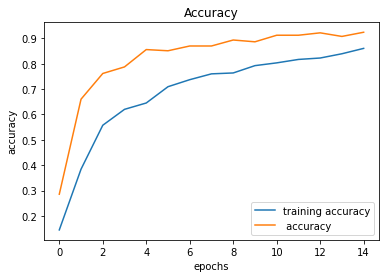

In [21]:
#val accuracy 
plt.figure(0)
plt.plot(val_history.history['accuracy'], label='training accuracy')
plt.plot(val_history.history['val_accuracy'], label=' accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

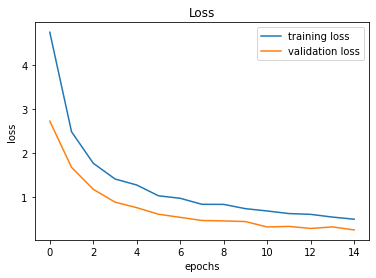

In [22]:
#val Loss

plt.plot(val_history.history['loss'], label='training loss')
plt.plot(val_history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

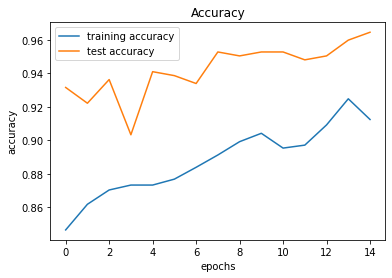

In [23]:
#test accuracy 
plt.figure(0)
plt.plot(test_history.history['accuracy'], label='training accuracy')
plt.plot(test_history.history['val_accuracy'], label='test accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

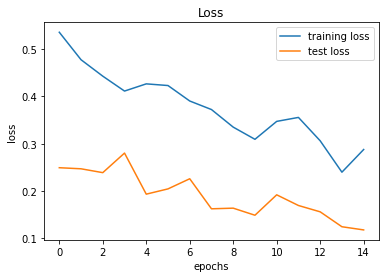

In [24]:
#test Loss

plt.plot(test_history.history['loss'], label='training loss')
plt.plot(test_history.history['val_loss'], label='test loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Lets predict our test set results

In [25]:
test_set_Predictions = []
for i in model.predict(X_test):
  test_set_Predictions.append(np.argmax(i))

test_set_Predictions = np.array(test_set_Predictions)


In [26]:
test_set_Predictions

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 40, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 40, 12, 12, 12, 12, 12, 12,
       12, 40, 40, 12, 12, 12, 12, 12, 40, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 40, 12, 12, 12, 12, 12, 40, 12,
       12, 12, 40, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 40, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       40, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 40, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 40, 12, 12, 12, 40, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 40, 12, 12, 12,
       12, 12, 12, 12, 12

**y_test is in one hot encoded form and hence to check the accuracy score between y_test and test_set_Predictions, we have to one hot encode test_set_Predictions too**

In [27]:
test_set_Predictions = to_categorical(test_set_Predictions,58) 

In [ ]:
from sklearn.metrics import accuracy_score

The final accuracy score comparing the predictions made for the test set to the actual results of the test set

In [28]:
accuracy_score(y_test, test_set_Predictions)

0.01179245283018868